In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data1 = pd.read_csv('ReasonMNSR_BD_Dh.csv')
data1.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")
/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,Date,Shift,Machine Type,Machine No.,Bd time start,Bd time end,Repair start time,Repair end time,BD Time,Reason of Bd,Reason of delay,Shift inchage,Comments,BD clean
0,Dhansar,05/01/24,A,Truck,E-4,6:00,9:44,NaN,NaN,3:44:00,Tyre puncture,NaN,Animesh tiwari,Tyre puncture,Tyre puncture
1,Dhansar,05/01/24,A,Truck,E-10,9:00,12:20,NaN,NaN,3:20:00,Air filter change,NaN,Animesh tiwari,NaN,Air filter change
2,Dhansar,05/01/24,A,Truck,E-5,7:49,11:49,NaN,NaN,4:00:00,Diesel shortage,NaN,Animesh tiwari,Diesel shortage,Diesel shortage
3,Dhansar,05/01/24,A,Truck,V-17,6:45,10:15,NaN,NaN,3:30:00,Ad blue filling,NaN,Animesh tiwari,Diesel ad blue,Ad blue filling
4,Dhansar,05/01/24,A,Truck,V-18,7:00,10:15,NaN,NaN,3:15:00,Ad blue filling,NaN,Animesh tiwari,Diesel ad blue,Ad blue filling


In [ ]:
data1['Reason of Bd'].value_counts()

Reason of Bd
Tyre puncture             174
Ad blue filling            34
Diesel shortage            11
Ad blue                     8
AC problem                  7
                         ... 
Tooth change                1
Mobile                      1
Replace E-11                1
Service for camp            1
Engine signal +Ad blue      1
Name: count, Length: 145, dtype: int64

In [ ]:
data1['Reason of Bd'].count()

447

In [ ]:
count = data1['Reason of Bd'].str.contains('tyre', case=False).sum()
print(count)

203


In [ ]:
# Handle missing values before applying the string operation
data1['Reason of Bd'] = data1['Reason of Bd'].fillna('')  # Replace missing values with empty strings
unique_rows = data1[data1['Reason of Bd'].str.contains('tyre', case=False)]['Reason of Bd'].unique()
print(unique_rows)

['Tyre puncture' 'Bolder on tyre' 'Volte tyre' 'Tyre change'
 'Tyre puntue (volt tyre)' 'Tyre puncher' 'Tyre Puncture'
 'Adblue tankey lock problem tyre change' 'Tyre punture '
 'take sole tyre crack' 'Tyre change ' 'Ad blue / tyre puncture'
 'Tyre puncture ']


In [ ]:
data1['Reason of Bd'] = data1['Reason of Bd'].str.replace('Tyre Puncture', 'Tyre puncture' ,regex = True)
data1['Reason of Bd'] = data1['Reason of Bd'].str.replace('Tyre puncher', 'Tyre puncture' ,regex = True)
data1['Reason of Bd'] = data1['Reason of Bd'].str.replace('Tyre punture', 'Tyre puncture' ,regex = True)
data1['Reason of Bd'] = data1['Reason of Bd'].str.replace('Tyre change ', 'Tyre change' ,regex = True)
data1['Reason of Bd'] = data1['Reason of Bd'].str.replace('Tyre puncture ', 'Tyre puncture' ,regex = True)
data1['Reason of Bd'] = data1['Reason of Bd'].str.replace('Tyre puntue (volt tyre)', 'Tyre puncture' ,regex = True)
data1['Reason of Bd'] = data1['Reason of Bd'].str.replace('take sole tyre crack', 'Tyre crack' ,regex = True)
data1['Reason of Bd'] = data1['Reason of Bd'].str.replace('Adblue tankey lock problem tyre change', 'Tyre crack' ,regex = True)
data1['Reason of Bd'] = data1['Reason of Bd'].str.replace('Bolder on tyre', 'Bolder on Tyre' ,regex = True)
data1['Reason of Bd'] = data1['Reason of Bd'].str.replace('Volte tyre', 'Volte Tyre' ,regex = True)
data1['Reason of Bd'] = data1['Reason of Bd'].str.replace('Ad blue / tyre puncture', 'Tyre puncture' ,regex = True)


unique_rows2 = data1[data1['Reason of Bd'].str.contains('tyre', case=False)]['Reason of Bd'].unique()
print(unique_rows2)

['Tyre puncture' 'Bolder on Tyre' 'Volte Tyre' 'Tyre change'
 'Tyre puntue (volt tyre)' 'Tyre crack']


In [ ]:
data1['Reason of Bd'].value_counts()

Reason of Bd
Tyre puncture             193
Ad blue filling            34
                           11
Diesel shortage            11
Ad blue                     8
                         ... 
Replace E-11                1
Service for camp            1
Stake loose                 1
Hose pipe problem           1
Engine signal +Ad blue      1
Name: count, Length: 139, dtype: int64

<ipython-input-9-b85cc2e87c40>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shift', data=data1, palette='viridis')


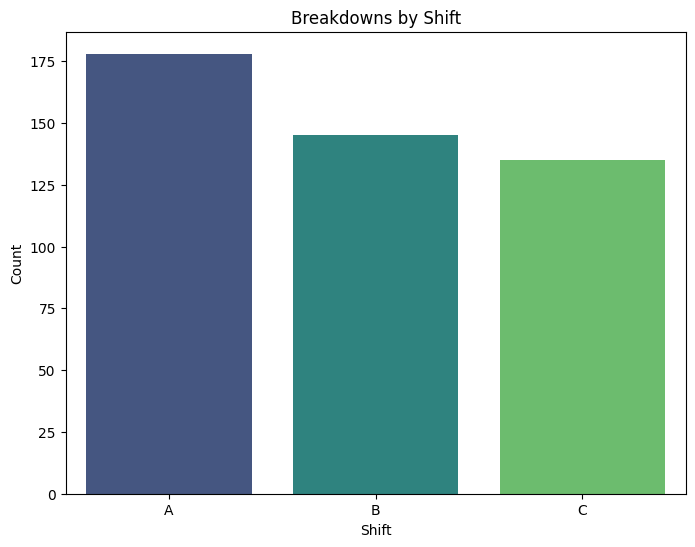

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Shift', data=data1, palette='viridis')
plt.title('Breakdowns by Shift')
plt.xlabel('Shift')
plt.ylabel('Count')
plt.show()


for **Tyre** **breakdown**

In [ ]:
td = data1[data1['Reason of Bd'].str.contains('Tyre', na=False)]
td.tail()

,Unnamed: 0,Date,Shift,Machine Type,Machine No.,Bd time start,Bd time end,Repair start time,Repair end time,BD Time,Reason of Bd,Reason of delay,Shift inchage,Comments,BD clean
448,Dhansar,06/15/24,C,Truck,E-4,12:30,1:45,NaN,NaN,13:15:00,Tyre puncture,NaN,Krishna singh,NaN,NaN
449,Dhansar,06/15/24,C,Truck,E-7,1:00,2:15,NaN,NaN,1:15:00,Tyre puncture,NaN,Krishna singh,NaN,NaN
453,Dhansar,06/16/24,A,Truck,E-10,12:05,12:40,NaN,NaN,0:35:00,Tyre puncture,NaN,Animesh tiwary,NaN,NaN
454,Dhansar,06/16/24,C,Truck,E-9,NaN,12:47,NaN,NaN,NaN,Tyre puncture,NaN,Krishna singh,NaN,NaN
456,Dhansar,06/16/24,C,Truck,E-4,NaN,3:20,NaN,NaN,NaN,Tyre puncture,NaN,Krishna singh,NaN,NaN


<ipython-input-11-6839086fa107>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Reason of Bd', data=td, palette='viridis')  # Pass the DataFrame directly


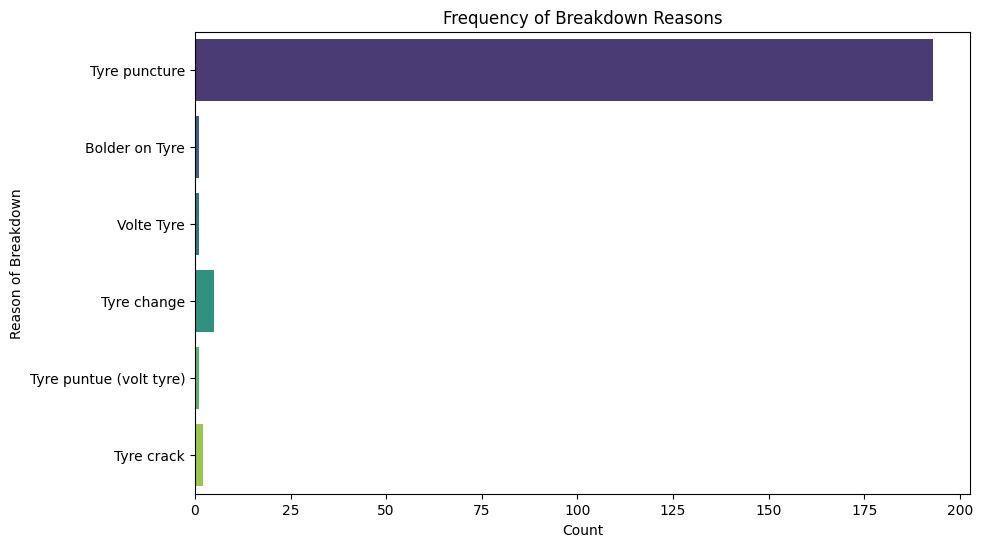

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Reason of Bd', data=td, palette='viridis')  # Pass the DataFrame directly
plt.title('Frequency of Breakdown Reasons')
plt.xlabel('Count')
plt.ylabel('Reason of Breakdown')
plt.show()

<ipython-input-12-5dd26c7aef01>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Shift', data=td, palette='viridis')


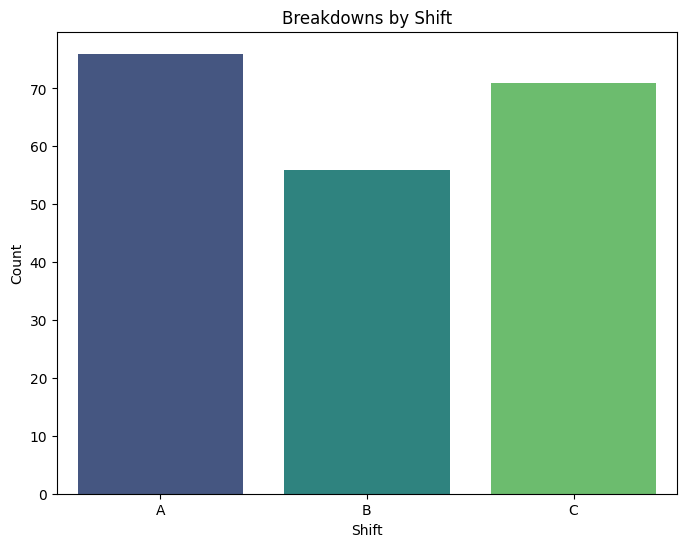

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Shift', data=td, palette='viridis')
plt.title('Breakdowns by Shift')
plt.xlabel('Shift')
plt.ylabel('Count')
plt.show()

<ipython-input-13-552bf4f2b021>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Machine Type', data=td, order=td['Machine Type'].value_counts().index, palette='viridis')


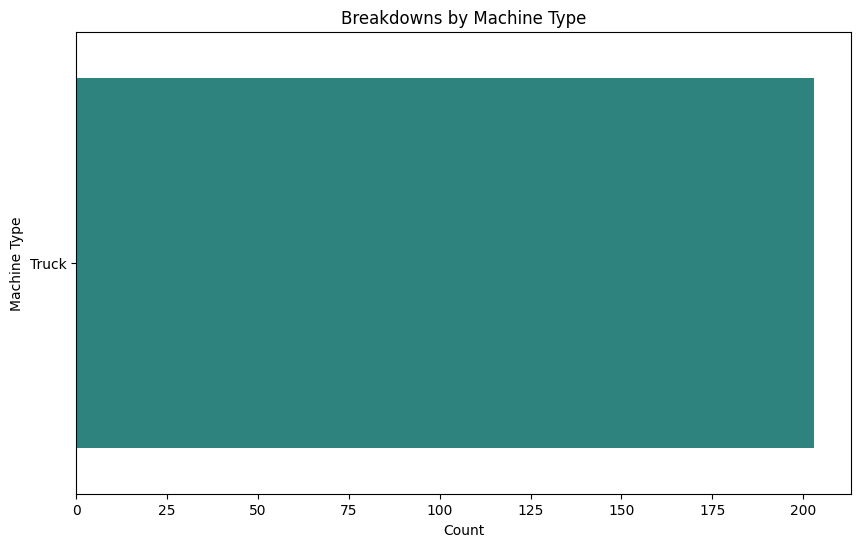

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Machine Type', data=td, order=td['Machine Type'].value_counts().index, palette='viridis')
plt.title('Breakdowns by Machine Type')
plt.xlabel('Count')
plt.ylabel('Machine Type')
plt.show()

In [ ]:
print(td['Date'].dtype)

object


In [ ]:
td['Date'] = pd.to_datetime(td['Date'])
print(td['Date'].dtype)

datetime64[ns]


<ipython-input-15-aaa03e6dd8c1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  td['Date'] = pd.to_datetime(td['Date'])
<ipython-input-15-aaa03e6dd8c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td['Date'] = pd.to_datetime(td['Date'])


In [ ]:
td = td.sort_values(by='Date')
td.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,Date,Shift,Machine Type,Machine No.,Bd time start,Bd time end,Repair start time,Repair end time,BD Time,Reason of Bd,Reason of delay,Shift inchage,Comments,BD clean
0,Dhansar,2024-05-01,A,Truck,E-4,6:00,9:44,NaN,NaN,3:44:00,Tyre puncture,NaN,Animesh tiwari,Tyre puncture,Tyre puncture
5,Dhansar,2024-05-01,A,Truck,E-13,6:00,12:00,NaN,NaN,6:00:00,Tyre puncture,NaN,Animesh tiwari,Tyre Puncture,Tyre puncture
8,Dhansar,2024-05-02,A,Truck,E-13,8:50,12:20,NaN,NaN,3:30:00,Tyre puncture,NaN,Animesh tiwari,Tyre Puncture,Tyre puncture
12,Dhansar,2024-05-02,A,Truck,E-1,7:30,8:45,NaN,NaN,1:15:00,Tyre puncture,NaN,Animesh tiwari,Tyre Puncture,Tyre puncture
16,Dhansar,2024-05-02,B,Truck,E-12,14:00/19:00,17:25/20:20,NaN,NaN,3:25:00,Tyre puncture,NaN,Ganesh rajwar,Service Puncture,Tyre puncture


In [ ]:
# Replace '#VALUE!' with NaNs
data1['BD Time'] = data1['BD Time'].replace('#VALUE!', pd.NaT)

# Convert the 'BD Time' to timedelta
data1['BD Time'] = pd.to_timedelta(data1['BD Time'])

In [ ]:
print(td['BD Time'].dtype)

object


In [ ]:
td.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,Date,Shift,Machine Type,Machine No.,Bd time start,Bd time end,Repair start time,Repair end time,BD Time,Reason of Bd,Reason of delay,Shift inchage,Comments,BD clean
0,Dhansar,2024-05-01,A,Truck,E-4,6:00,9:44,NaN,NaN,3:44:00,Tyre puncture,NaN,Animesh tiwari,Tyre puncture,Tyre puncture
5,Dhansar,2024-05-01,A,Truck,E-13,6:00,12:00,NaN,NaN,6:00:00,Tyre puncture,NaN,Animesh tiwari,Tyre Puncture,Tyre puncture
8,Dhansar,2024-05-02,A,Truck,E-13,8:50,12:20,NaN,NaN,3:30:00,Tyre puncture,NaN,Animesh tiwari,Tyre Puncture,Tyre puncture
12,Dhansar,2024-05-02,A,Truck,E-1,7:30,8:45,NaN,NaN,1:15:00,Tyre puncture,NaN,Animesh tiwari,Tyre Puncture,Tyre puncture
16,Dhansar,2024-05-02,B,Truck,E-12,14:00/19:00,17:25/20:20,NaN,NaN,3:25:00,Tyre puncture,NaN,Ganesh rajwar,Service Puncture,Tyre puncture


<Axes: xlabel='Machine No.', ylabel='Shift'>

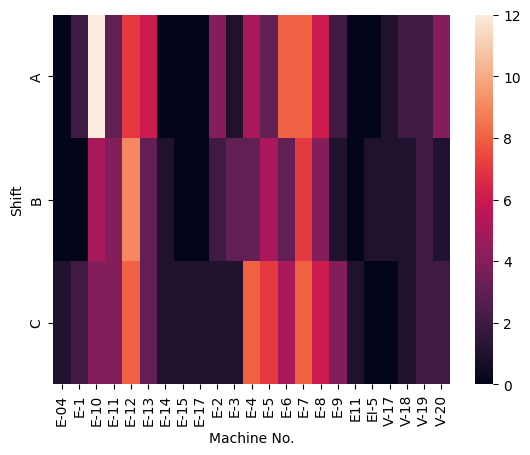

In [ ]:
# prompt: Using dataframe td: heat map

import pandas as pd
import seaborn as sns

# Create a heatmap
sns.heatmap(pd.crosstab(td['Shift'], td['Machine No.']))


In [ ]:
data1 = data1.dropna(subset=['Machine No.'])

In [ ]:
td['Reason of Bd'].value_counts()

Reason of Bd
Tyre puncture              193
Tyre change                  5
Tyre crack                   2
Bolder on Tyre               1
Volte Tyre                   1
Tyre puntue (volt tyre)      1
Name: count, dtype: int64

In [ ]:
td['Machine No.'].value_counts()

Machine No.
E-12    24
E-7     23
E-10    21
E-4     16
E-8     16
E-6     16
E-5     15
E-13    12
E-11    11
V-20     7
E-9      7
E-2      7
V-19     6
E-3      5
V-18     4
E-1      4
V-17     2
E-14     2
E11      1
EI-5     1
E-15     1
E-17     1
E-04     1
Name: count, dtype: int64

In [ ]:
# Frequency analysis of machine number entries
machine_freq = data1['Machine No.'].value_counts().reset_index()
machine_freq.columns = ['Machine No.', 'Frequency']
print(machine_freq.head())


  Machine No.  Frequency
0        E-13         38
1         E-6         33
2        E-10         32
3        E-12         32
4         E-7         31


In [ ]:
# Frequency analysis of each shift
shift_freq = td['Shift'].value_counts().reset_index()
shift_freq.columns = ['Shift', 'Frequency']
print(shift_freq.head())


  Shift  Frequency
0     A         76
1     C         71
2     B         56


In [ ]:
# Frequency analysis of each breakdown reason
reason_freq = td['Reason of Bd'].value_counts().reset_index()
reason_freq.columns = ['Reason of Bd', 'Frequency']
print(reason_freq.head())


     Reason of Bd  Frequency
0   Tyre puncture        193
1     Tyre change          5
2      Tyre crack          2
3  Bolder on Tyre          1
4      Volte Tyre          1


In [ ]:
# Frequency analysis of each shift incharge
incharge_freq = td['Shift inchage'].value_counts().reset_index()
incharge_freq.columns = ['Shift inchage', 'Frequency']
print(incharge_freq.head())


    Shift inchage  Frequency
0   Ganesh rajwar         74
1   Krishna singh         31
2  Animesh tiwary         31
3  Animesh tiwari         24
4  Krishna singh          17


In [ ]:
# Check the data type of 'BD Time' before converting
print(td['BD Time'].dtype)

# If 'BD Time' is already datetime64[ns], no conversion is needed.
# If it's a different format, you might need to adjust the conversion accordingly.

# Group by 'Reason of Bd' and calculate total delay time for each reason
total_delay_time = td.groupby('Reason of Bd')['BD Time'].sum().reset_index()
total_delay_time.columns = ['Reason of Bd', 'Total Delay Time (hours)']
print(total_delay_time.head())

object
              Reason of Bd                           Total Delay Time (hours)
0           Bolder on Tyre                                                  0
1              Tyre change                                     1:19:005:25:00
2               Tyre crack                                     3:30:001:00:00
3            Tyre puncture  3:44:006:00:003:30:001:15:003:25:000:35:0014:1...
4  Tyre puntue (volt tyre)                                            0:55:00


In [ ]:
# Clean the data
td = td.dropna(subset=['Reason of Bd', 'BD Time'])

# Convert BD Time to total hours
td['BD Time'] = pd.to_timedelta(td['BD Time'])
td['BD Time (hours)'] = td['BD Time'].dt.total_seconds() / 3600

# Calculate total delay time for each breakdown reason
total_delay_time = td.groupby('Reason of Bd')['BD Time (hours)'].sum().reset_index()
total_delay_time = total_delay_time.sort_values(by='BD Time (hours)', ascending=False)

# Print the total delay time result
print(total_delay_time.head())

              Reason of Bd  BD Time (hours)
2            Tyre puncture       489.966667
0              Tyre change         6.733333
1               Tyre crack         4.500000
4               Volte Tyre         1.200000
3  Tyre puntue (volt tyre)         0.916667


<ipython-input-29-481ff3349793>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td['BD Time'] = pd.to_timedelta(td['BD Time'])
<ipython-input-29-481ff3349793>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td['BD Time (hours)'] = td['BD Time'].dt.total_seconds() / 3600
